In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
def evaluate_knn_kfold(k_neighbors=5):
    metrics = {
        'train': {'accuracy': [], 'precision': [], 'recall': [], 'f1_macro': [], 'f1_weighted': [], 'f1_class0': [], 'f1_class1': []},
        'test': {'accuracy': [], 'precision': [], 'recall': [], 'f1_macro': [], 'f1_weighted': [], 'f1_class0': [], 'f1_class1': []}
    }
    label_column = 'y'

    for i in range(1, 11):
        train_path = f'testData/kfold_fold_{i}_train.csv'
        test_path = f'testData/kfold_fold_{i}_test.csv'
        df_train = pd.read_csv(train_path)
        df_test = pd.read_csv(test_path)
        X_train = df_train.drop(label_column, axis=1)
        y_train = df_train[label_column]
        X_test = df_test.drop(label_column, axis=1)
        y_test = df_test[label_column]

        model = KNeighborsClassifier(n_neighbors=k_neighbors)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        for dataset, X, y_true, y_pred in [('train', X_train, y_train, y_train_pred), ('test', X_test, y_test, y_test_pred)]:
            metrics[dataset]['accuracy'].append(accuracy_score(y_true, y_pred))
            metrics[dataset]['precision'].append(precision_score(y_true, y_pred, zero_division=0))
            metrics[dataset]['recall'].append(recall_score(y_true, y_pred, zero_division=0))
            metrics[dataset]['f1_macro'].append(f1_score(y_true, y_pred, average='macro', zero_division=0))
            metrics[dataset]['f1_weighted'].append(f1_score(y_true, y_pred, average='weighted', zero_division=0))
            metrics[dataset]['f1_class0'].append(f1_score(y_true, y_pred, pos_label=0, zero_division=0))
            metrics[dataset]['f1_class1'].append(f1_score(y_true, y_pred, pos_label=1, zero_division=0))

        print(f"Fold {i} - Train Accuracy: {metrics['train']['accuracy'][-1]:.4f}, Test Accuracy: {metrics['test']['accuracy'][-1]:.4f}")

    return metrics

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
train_conf_matrices = []
test_conf_matrices = []

def evaluate_knn_kfold(k_neighbors=5):
    metrics = {
        'train': {'accuracy': [], 'precision': [], 'recall': [], 'f1_macro': [], 'f1_weighted': [], 'f1_class0': [], 'f1_class1': []},
        'test': {'accuracy': [], 'precision': [], 'recall': [], 'f1_macro': [], 'f1_weighted': [], 'f1_class0': [], 'f1_class1': []}
    }
    global train_conf_matrices, test_conf_matrices
    train_conf_matrices = []
    test_conf_matrices = []
    label_column = 'y'

    for i in range(1, 11):
        train_path = f'testData/kfold_fold_{i}_train.csv'
        test_path = f'testData/kfold_fold_{i}_test.csv'
        df_train = pd.read_csv(train_path)
        df_test = pd.read_csv(test_path)
        X_train = df_train.drop(label_column, axis=1)
        y_train = df_train[label_column]
        X_test = df_test.drop(label_column, axis=1)
        y_test = df_test[label_column]

        model = KNeighborsClassifier(n_neighbors=k_neighbors)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        for dataset, y_true, y_pred in [('train', y_train, y_train_pred), ('test', y_test, y_test_pred)]:
            metrics[dataset]['accuracy'].append(accuracy_score(y_true, y_pred))
            metrics[dataset]['precision'].append(precision_score(y_true, y_pred, zero_division=0))
            metrics[dataset]['recall'].append(recall_score(y_true, y_pred, zero_division=0))
            metrics[dataset]['f1_macro'].append(f1_score(y_true, y_pred, average='macro', zero_division=0))
            metrics[dataset]['f1_weighted'].append(f1_score(y_true, y_pred, average='weighted', zero_division=0))
            metrics[dataset]['f1_class0'].append(f1_score(y_true, y_pred, pos_label=0, zero_division=0))
            metrics[dataset]['f1_class1'].append(f1_score(y_true, y_pred, pos_label=1, zero_division=0))

        train_conf_matrices.append(confusion_matrix(y_train, y_train_pred))
        test_conf_matrices.append(confusion_matrix(y_test, y_test_pred))
        print(f"Fold {i} - Train Accuracy: {metrics['train']['accuracy'][-1]:.4f}, Test Accuracy: {metrics['test']['accuracy'][-1]:.4f}")
    return metrics

In [6]:
metrics = evaluate_knn_kfold(k_neighbors=5)

Fold 1 - Train Accuracy: 0.9088, Test Accuracy: 0.8981
Fold 2 - Train Accuracy: 0.9096, Test Accuracy: 0.8835
Fold 3 - Train Accuracy: 0.9099, Test Accuracy: 0.9029
Fold 4 - Train Accuracy: 0.9102, Test Accuracy: 0.8956
Fold 5 - Train Accuracy: 0.9110, Test Accuracy: 0.8835
Fold 6 - Train Accuracy: 0.9126, Test Accuracy: 0.8689
Fold 7 - Train Accuracy: 0.9072, Test Accuracy: 0.9150
Fold 8 - Train Accuracy: 0.9145, Test Accuracy: 0.8811
Fold 9 - Train Accuracy: 0.9077, Test Accuracy: 0.9005
Fold 10 - Train Accuracy: 0.9115, Test Accuracy: 0.8783


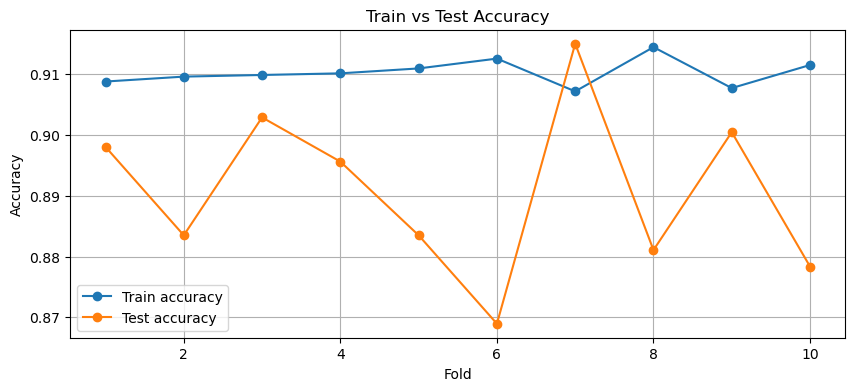

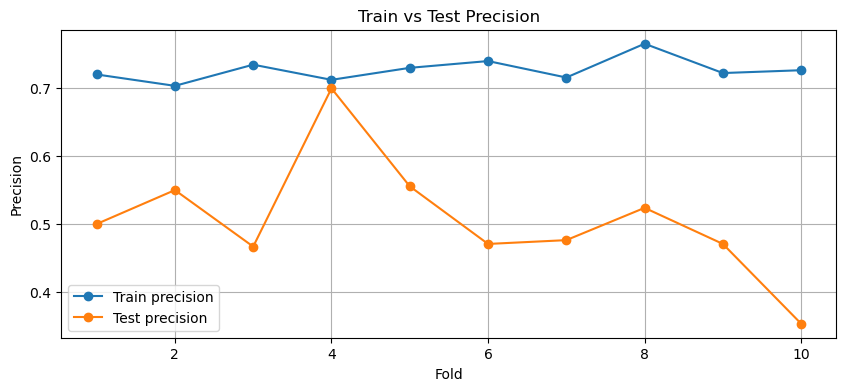

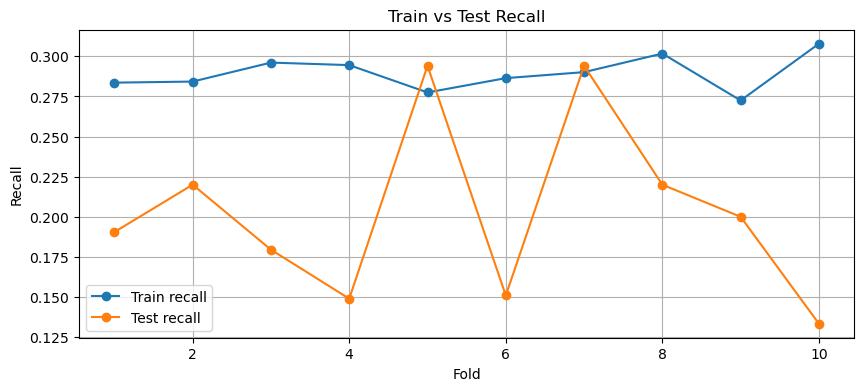

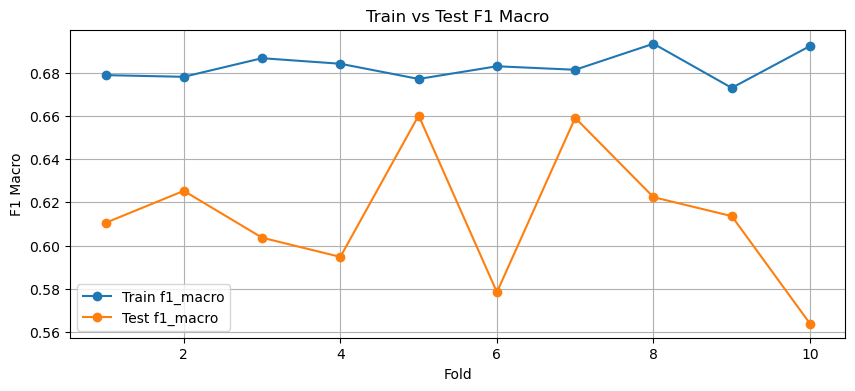

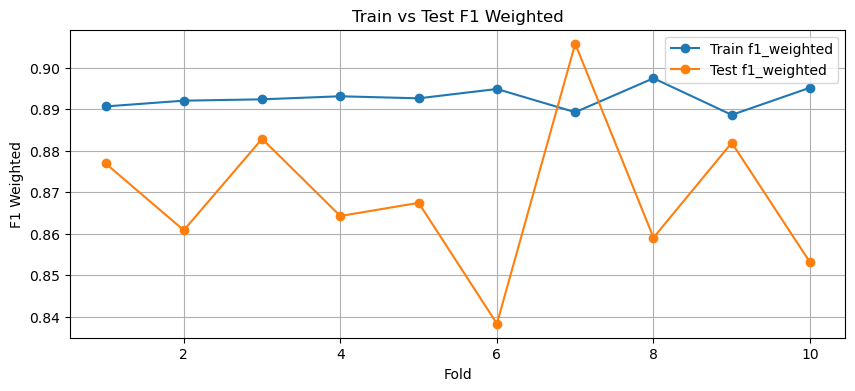

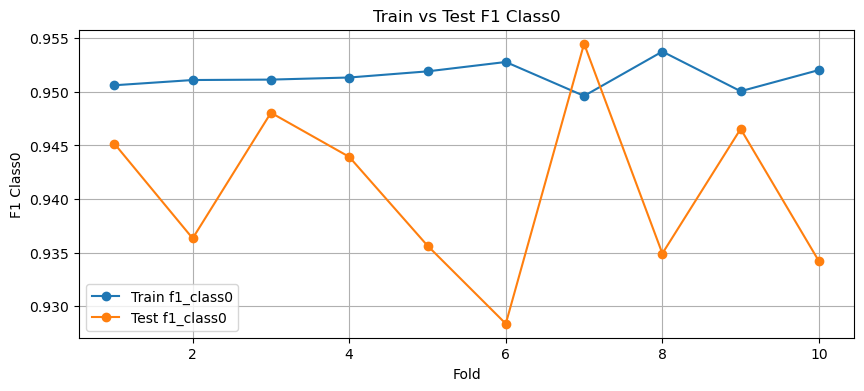

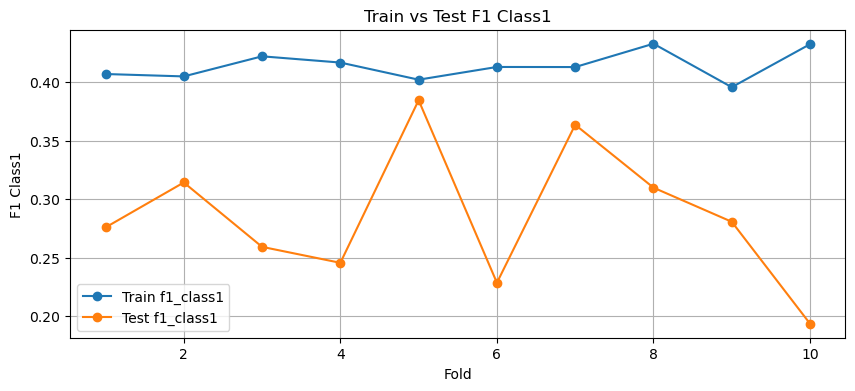

In [7]:
# 📊 Compare All Train vs Test Metrics
folds = list(range(1, 11))
measures = ['accuracy', 'precision', 'recall', 'f1_macro', 'f1_weighted', 'f1_class0', 'f1_class1']

for measure in measures:
    plt.figure(figsize=(10, 4))
    plt.plot(folds, metrics['train'][measure], marker='o', label=f'Train {measure}')
    plt.plot(folds, metrics['test'][measure], marker='o', label=f'Test {measure}')
    plt.title(f'Train vs Test {measure.replace("_", " ").title()}')
    plt.xlabel('Fold')
    plt.ylabel(measure.replace('_', ' ').title())
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
# 📋 Summary Table: Mean and Std Dev of All Metrics
import pandas as pd

summary_data = {}
for split in ['train', 'test']:
    for metric, values in metrics[split].items():
        summary_data[f'{split}_{metric}_mean'] = [np.mean(values)]
        summary_data[f'{split}_{metric}_std'] = [np.std(values)]

summary_df = pd.DataFrame(summary_data).T
summary_df.columns = ['Value']
summary_df

,Value
train_accuracy_mean,0.910307
train_accuracy_std,0.002092
train_precision_mean,0.727336
train_precision_std,0.016401
train_recall_mean,0.289481
train_recall_std,0.010303
train_f1_macro_mean,0.682735
train_f1_macro_std,0.006237
train_f1_weighted_mean,0.892594
train_f1_weighted_std,0.002576


In [9]:
# 💾 Save Metrics to CSV
fold_metrics = []
for i in range(10):
    row = {'Fold': i + 1}
    for split in ['train', 'test']:
        for metric in metrics[split]:
            row[f'{split}_{metric}'] = metrics[split][metric][i]
    fold_metrics.append(row)

metrics_df = pd.DataFrame(fold_metrics)
metrics_df.to_csv('knn_fold_metrics.csv', index=False)
print("Saved fold-wise metrics to knn_fold_metrics.csv")

Saved fold-wise metrics to knn_fold_metrics.csv


In [10]:
# 📁 Export to Excel
with pd.ExcelWriter('knn_metrics_report.xlsx') as writer:
    metrics_df.to_excel(writer, index=False, sheet_name='Fold Metrics')
    summary_df.to_excel(writer, sheet_name='Summary Stats')
print("Saved metrics to knn_metrics_report.xlsx")

Saved metrics to knn_metrics_report.xlsx


In [11]:
# 🖼 Export Line Charts as PNGs for Each Metric
import os
os.makedirs('metric_charts', exist_ok=True)

for measure in measures:
    plt.figure(figsize=(10, 4))
    plt.plot(folds, metrics['train'][measure], marker='o', label=f'Train {measure}')
    plt.plot(folds, metrics['test'][measure], marker='o', label=f'Test {measure}')
    plt.title(f'Train vs Test {measure.replace("_", " ").title()}')
    plt.xlabel('Fold')
    plt.ylabel(measure.replace('_', ' ').title())
    plt.legend()
    plt.grid(True)
    plt.savefig(f'metric_charts/{measure}.png')
    plt.close()
print("Exported metric charts to the 'metric_charts' folder.")

Exported metric charts to the 'metric_charts' folder.


In [12]:
# 🧩 Save Confusion Matrices as PNGs
os.makedirs('confusion_matrices/train', exist_ok=True)
os.makedirs('confusion_matrices/test', exist_ok=True)

for i in range(10):
    fig, ax = plt.subplots()
    ConfusionMatrixDisplay(train_conf_matrices[i]).plot(ax=ax)
    plt.title(f'Train Confusion Matrix - Fold {i+1}')
    plt.savefig(f'confusion_matrices/train/fold_{i+1}.png')
    plt.close()

    fig, ax = plt.subplots()
    ConfusionMatrixDisplay(test_conf_matrices[i]).plot(ax=ax)
    plt.title(f'Test Confusion Matrix - Fold {i+1}')
    plt.savefig(f'confusion_matrices/test/fold_{i+1}.png')
    plt.close()

print("Confusion matrices saved to confusion_matrices/train/ and confusion_matrices/test/")

Confusion matrices saved to confusion_matrices/train/ and confusion_matrices/test/
